In [2]:
#%matplotlib inline

import json
import pandas as pd
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
import math
from numpy.random import randn
from scipy.stats import hypergeom
import copy
import pandas_profiling
import statsmodels
import matplotlib

In [18]:
prefix = './data/'

with open(prefix + 'project_age_dict.json', 'r') as jf:
    project_age_dict = json.load(jf)
    
with open(prefix + 'tenure.json', 'r') as jf:
    tenure = json.load(jf)

with open(prefix + 'num_commits.json', 'r') as jf:
    num_commits = json.load(jf)
    
with open(prefix + 'num_comments.json', 'r') as jf:
    num_comments = json.load(jf)
    
with open(prefix + 'num_tenure.json', 'r') as jf:
    num_tenure = json.load(jf)

with open(prefix + 'exposure.json', 'r') as jf:
    exposure = json.load(jf)

with open(prefix + 'num_exposure.json', 'r') as jf:
    num_exposure = json.load(jf)
    
with open(prefix + 'involvement.json', 'r') as jf:
    involvement = json.load(jf)

with open(prefix + 'num_involvement.json', 'r') as jf:
    num_involvement = json.load(jf)
    
with open(prefix + 'sentiment.json', 'r') as jf:
    sentiment = json.load(jf)

with open(prefix + 'num_sentiment.json', 'r') as jf:
    num_sentiment = json.load(jf)
    
with open(prefix + 'active.json', 'r') as jf:
    active = json.load(jf)

with open(prefix + 'num_active.json', 'r') as jf:
    num_active = json.load(jf)
    
with open(prefix + 'tenure_distribution.txt', 'r') as f:
    tenure_distribution = eval(f.readlines()[0])

In [181]:
'-----------------------------------------Loading complete--------------------------------------------------------'

'-----------------------------------------Loading complete--------------------------------------------------------'

In [5]:

def regularization(lst):
    
    ratio = 0.02
    
    sorted_lst = sorted(lst)
    
    leng = len(sorted_lst)
    
    rst_lst = sorted_lst[int(leng*ratio):int(leng*(1-ratio))]
    
    return rst_lst



In [6]:
# calculating ratio of involved devs

def get_ratio_over_time(dic):
    
    avg = []

    involvement_rst = []

    for project in dic:

        for tool in dic[project]:

            avg.append(dic[project][tool])


    zipped = list(zip(*avg))

    #print(zipped[0])

    involvement_rst = copy.deepcopy(zipped)

    for i in range(len(zipped)):

        involvement_rst[i] = []

        for j in range(len(zipped[i])):

            if type(zipped[i][j]) != int:

                involvement_rst[i].append(zipped[i][j])


    # z-scores
    
    avgs = [sum(c)/len(c) for c in involvement_rst]
    
    ratio_list = involvement_rst
    
    return [avgs, ratio_list]

In [7]:
# calculating num of negative devs

def get_num_over_time(dic):
    
    avg = []

    active_rst = []

    for project in dic:

        for tool in dic[project]:

            avg.append(dic[project][tool])

    zipped = list(zip(*avg))

    active_rst = copy.deepcopy(zipped)


    for i in range(len(zipped)):

        active_rst[i] = []

        for j in range(len(zipped[i])):

            active_rst[i].append(zipped[i][j])

    ####
      
    avgs = [sum(c)/len(c) for c in active_rst]
    
    nums_list = active_rst
    
    return [avgs, nums_list]

In [8]:
# calculating ratio of young devs
tenure_avgs, tenure_ratio_list = get_ratio_over_time(tenure)

# calculating ratio of exposed devs
exposure_avgs, exposure_ratio_list = get_ratio_over_time(exposure)

# calculating ratio of involved devs
involvement_avgs, involvement_ratio_list = get_ratio_over_time(involvement)

# calculating ratio of negative devs
sentiment_avgs, sentiment_ratio_list = get_ratio_over_time(sentiment)

# calculating ratio of active developers
active_avgs, active_ratio_list = get_ratio_over_time(active)


In [9]:
# calculating num of active devs
num_active_avgs, active_num_list  = get_num_over_time(num_active)

# calculating num of involved devs
num_involvement_avgs, involvement_num_list = get_num_over_time(num_involvement)

# calculating num of young devs
num_tenure_avgs, tenure_num_list = get_num_over_time(num_tenure)

# calculating num of negative devs
num_sentiment_avgs, sentiment_num_list = get_num_over_time(num_sentiment)

# calculating num of exposed devs
num_exposure_avgs, exposure_num_list = get_num_over_time(num_exposure)

# calculating num of comments
num_comments_avgs, comments_num_list = get_num_over_time(num_comments)

# calculating num of comments
num_commits_avgs, commits_num_list = get_num_over_time(num_commits)

In [10]:
import matplotlib

SMALL_SIZE = 16
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [11]:
'------------------------------------------------plotting--------------------------------------------------'

'------------------------------------------------plotting--------------------------------------------------'

/home/ylk1996/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


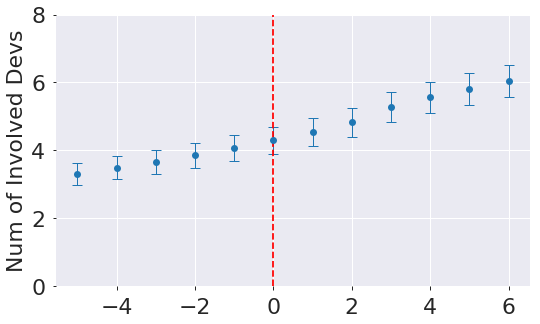

In [12]:
# plt.rcParams.update({'font.size': 22})

#font = {'family' : 'normal',
#            'size' :16}
#matplotlib.rc('font', **font)


fig = plt.figure(figsize=(8.5,5))

matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 

x = list(range(-5,7))

yerror = [np.std(y, ddof = 1)/np.sqrt(len(y)) for y in involvement_num_list]

plt.errorbar(x, num_involvement_avgs, yerr = yerror, fmt='o', elinewidth = 1, capsize = 5, capthick = 1)


#plt.xlabel('Relative Time to Adoption',  fontsize=14)
plt.ylabel('Num of Involved Devs', fontsize = 22)
plt.ylim((0, 8))

plt.axvline(x=0, color= 'r', ls='--')

# fig.suptitle('number of involved developers', fontsize=16)

fig.savefig("involved.pdf", bbox_inches='tight')

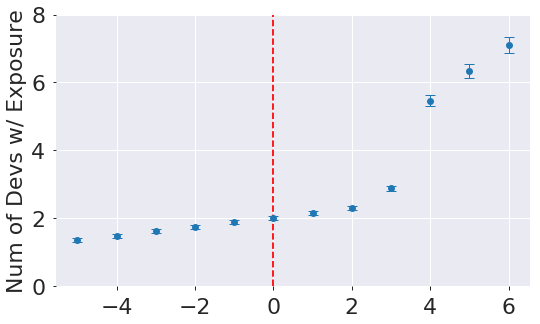

In [13]:

fig = plt.figure(figsize=(8.5,5))

matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 

yerror = [np.std(y, ddof = 1)/np.sqrt(len(y)) for y in exposure_num_list]

plt.errorbar(x, num_exposure_avgs, yerr = yerror, fmt='o', elinewidth = 1, capsize = 5, capthick = 1)

plt.ylabel('Num of Devs w/ Exposure',  fontsize=22)
plt.ylim((0, 8))
plt.axvline(x=0, color= 'r', ls='--')
fig.savefig("exposure.pdf", bbox_inches='tight')

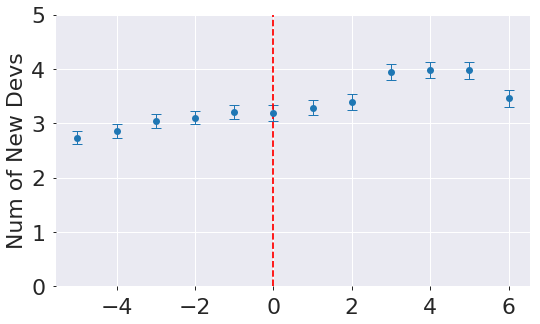

In [14]:

fig = plt.figure(figsize=(8.5,5))

matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 
yerror = [np.std(y, ddof = 1)/np.sqrt(len(y)) for y in tenure_num_list]

plt.errorbar(x, num_tenure_avgs, yerr = yerror, fmt='o', elinewidth = 1, capsize = 5, capthick = 1)

#plt.plot(num_tenure_avgs)
# plt.xlabel('Relative Time to Adoption',  fontsize=14)
plt.ylabel('Num of New Devs',  fontsize=22)
plt.ylim((0, 5))
plt.axvline(x=0, color= 'r', ls='--')


fig.savefig("young.pdf", bbox_inches='tight')

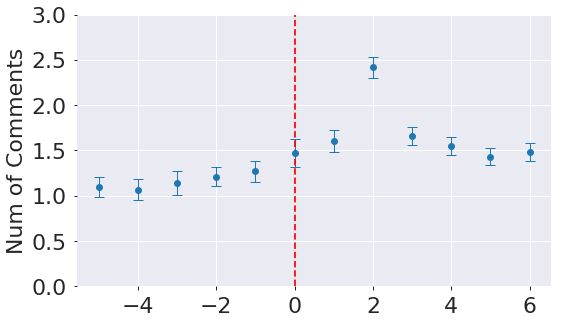

In [16]:

fig = plt.figure(figsize=(8.5,5))

matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 


# print(num_comments_avgs)

log = comments_num_list[:][:]
            
yerror = [np.std(y, ddof = 1)/len(y)**0.5 for y in log]

plt.errorbar(x, num_comments_avgs, yerr = yerror, fmt='o', elinewidth = 1, capsize = 5, capthick = 1)

#plt.plot(num_comments_avgs)
# plt.xlabel('Relative Time to Adoption',  fontsize=18)
plt.ylabel('Num of Comments',  fontsize=22)
plt.ylim((0, 4))

plt.axvline(x=0, color= 'r', ls='--')


# fig.suptitle('aggregated number of comments', fontsize=16)
fig.savefig("comments.pdf", bbox_inches='tight')


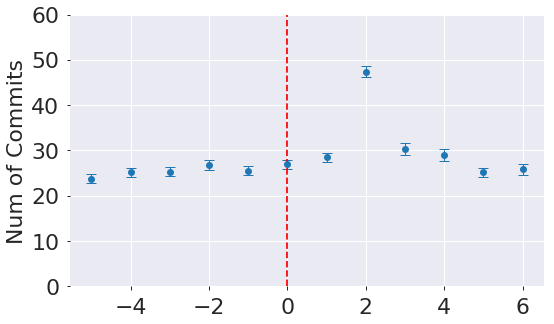

In [17]:
fig = plt.figure(figsize=(8.5,5))
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 
log = commits_num_list[:][:]

yerror = [np.std(y, ddof = 1)/len(y)**0.5 for y in log]

plt.errorbar(x, num_commits_avgs, yerr = yerror, fmt='o', elinewidth = 1, capsize = 5, capthick = 1)

plt.ylabel('Num of Commits',  fontsize=22)
plt.ylim((0, 60))
plt.axvline(x=0, color= 'r', ls='--')
fig.savefig("commits.pdf", bbox_inches='tight')